# Data Cleaning - Teams Post

In [2]:
import pandas as pd
from utils import *
import os

df = pd.read_csv('../data/teams_post.csv')
df.head()

,year,tmID,lgID,W,L
0,1,HOU,WNBA,6,0
1,1,ORL,WNBA,1,2
2,1,CLE,WNBA,3,3
3,1,WAS,WNBA,0,2
4,1,NYL,WNBA,4,3


## Dealing with Missing Values / Features

<Axes: title={'center': 'Number of null values per column'}>

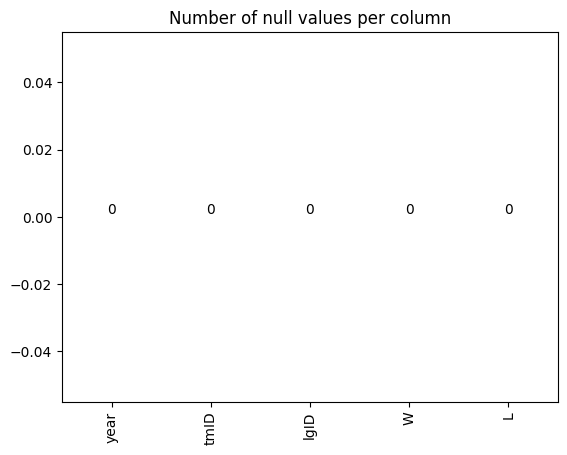

In [3]:
nulls_values_by_column(df)

## Dealing with Duplicate values / Redundant Data

<Axes: title={'center': 'Number of Unique Values Per Column'}>

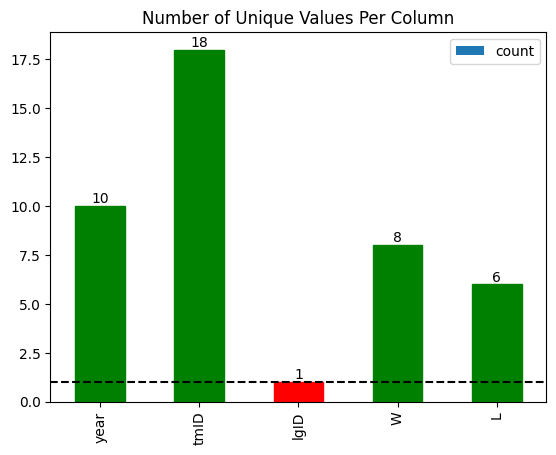

In [4]:
unique_values_by_column(df, 1)

In [5]:
num_columns = len(df.columns)
df = filter_column_uniques(df, 1)
print(f"Removed {num_columns - len(df.columns)} columns that had only one unique value")

Removed 1 columns that had only one unique value


In [6]:
num_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {num_rows - df.shape[0]} repeated rows")

Removed 0 repeated rows


## Outliers and Noise

### Detecting and Removing Outliers using ...

### ... z-score

This is a simple way to detect outliers using the z-score. The z-score is the number of standard deviations away from the mean a data point is. If the absolute value of the z-score is greater than 3, we can flag this data point as an outlier.

Let's take a look at the z-score range using a histogram plot.

<module 'matplotlib.pyplot' from '/home/daniel/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

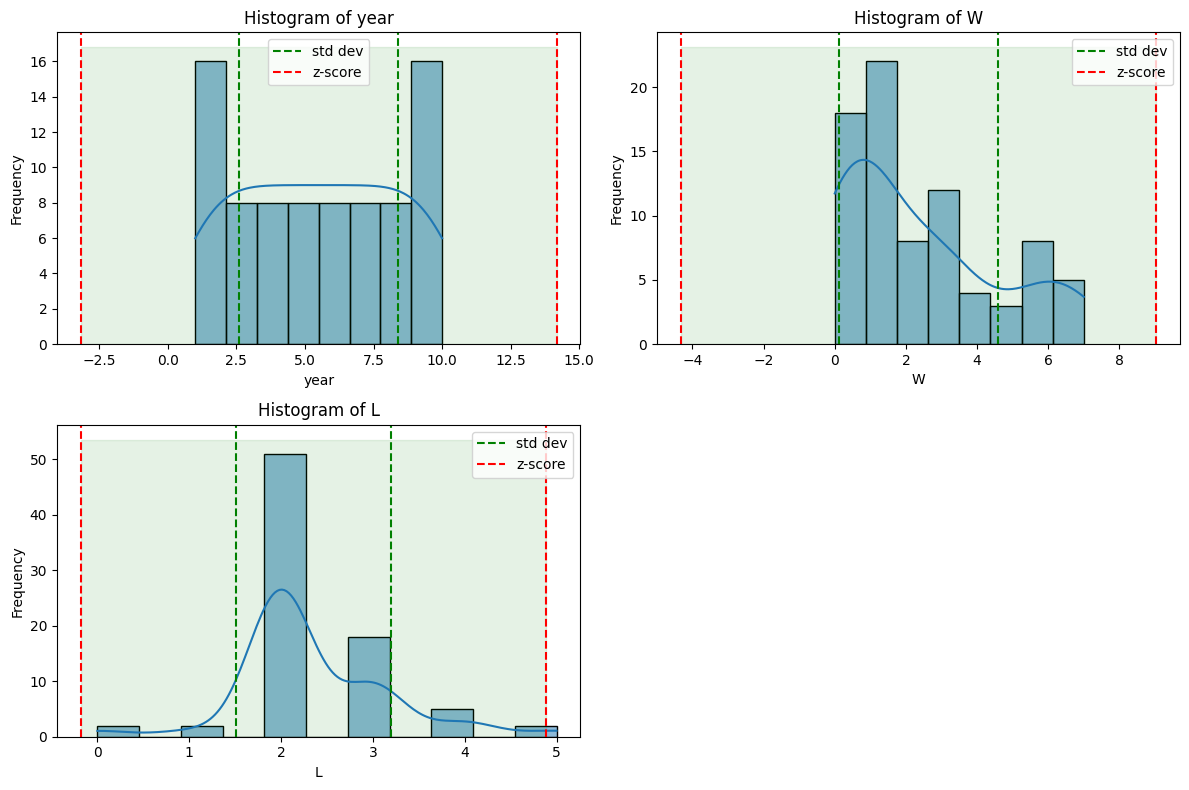

In [7]:
max_zscore = 3
rows2drop = set()
histogram_plot(df, max_zscore)

Now let's use the z-score to detect and remove outliers from the dataset.

In [8]:
#rows2drop_zscore = filter_by_zscore(df, max_zscore)
#print(f"Removed {len(rows2drop_zscore)} rows with zscore > {max_zscore}")

#rows2drop.update(rows2drop_zscore)

### ... Interquartile Range (IQR)

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The IQR may also be called the midspread or middle 50%. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

Let's take a look at the IQR range using a histogram plot.

<module 'matplotlib.pyplot' from '/home/daniel/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

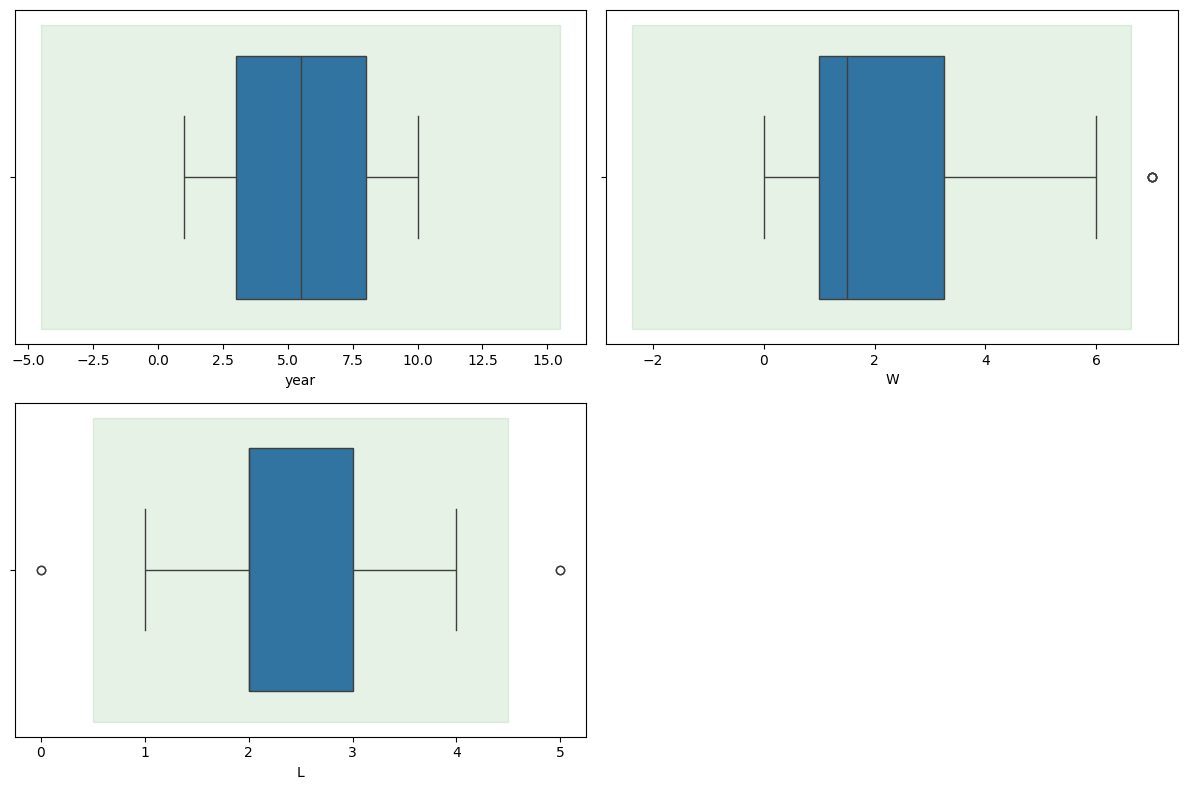

In [9]:
factor = 1.5
iqr_plot(df)

Now let's use the IQR to detect and remove outliers from the dataset.

In [10]:
#rows2drop_iqr = filter_by_iqr(df, factor, ['post_wins', 'lost', 'stint'])
#print(f"Removed {len(rows2drop_iqr)} rows with factor = {factor}")

#rows2drop.update(rows2drop_iqr)

### ... Scatter Plot

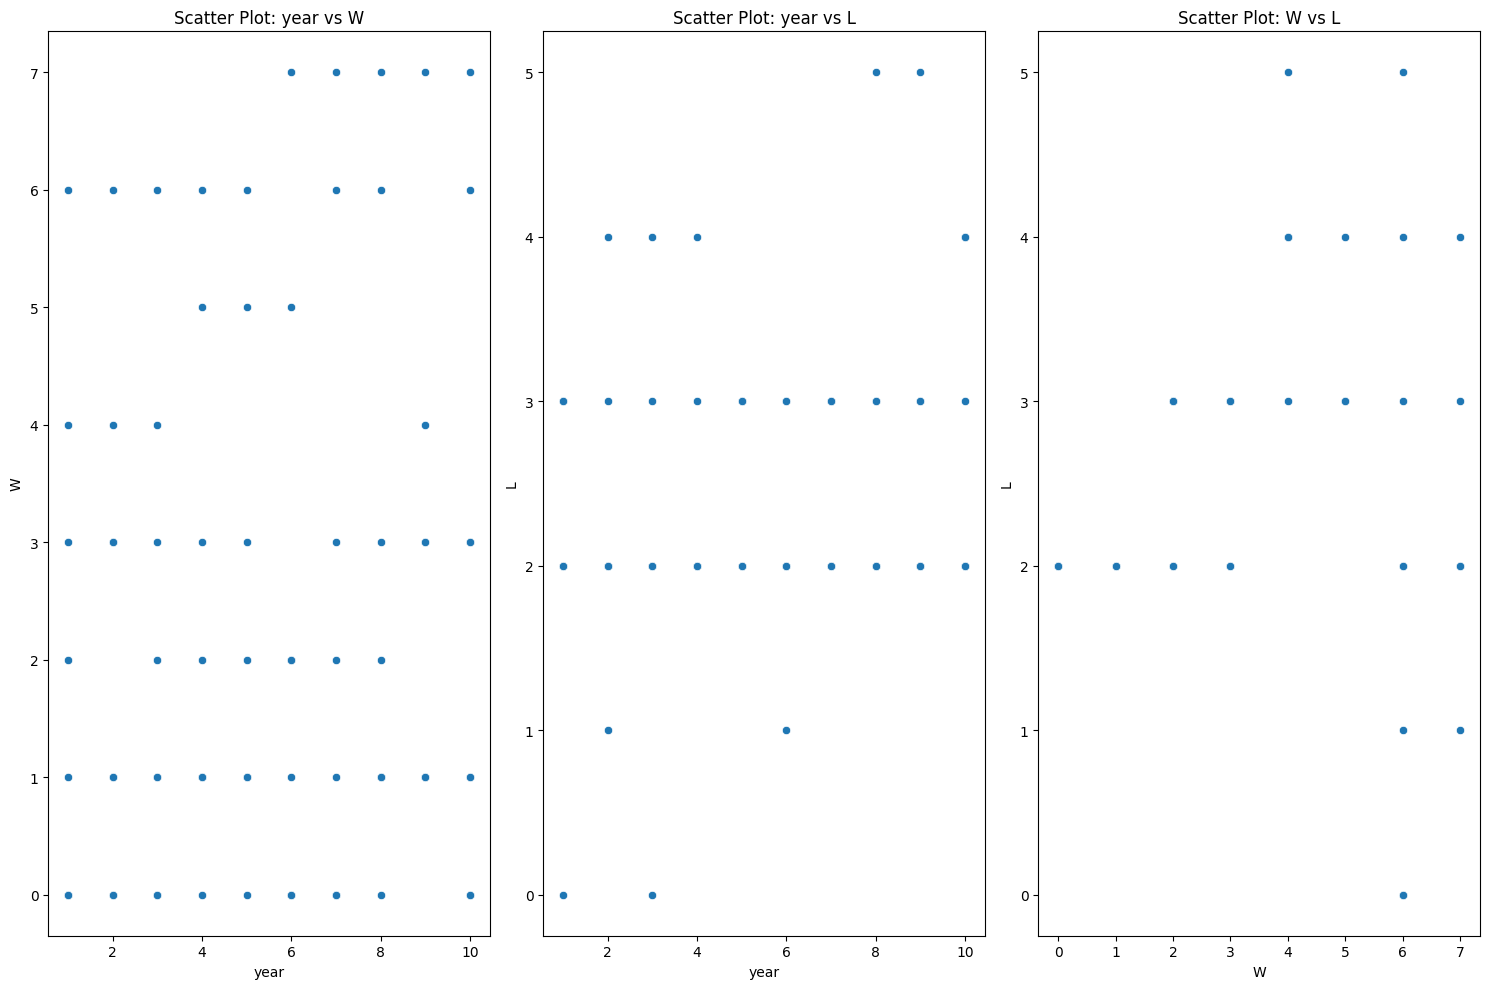

In [11]:
scatter_plot(df.drop(rows2drop))

In [12]:
print(f"Founded {len(rows2drop)} ({round(len(rows2drop) / df.shape[0] * 100, 1)}%) outliers")
df.drop(rows2drop, axis = 0, inplace=True)

Founded 0 (0.0%) outliers


## Save Dataset

In [13]:
if not os.path.exists('../data_clean'):
    os.makedirs('../data_clean')

df.to_csv('../data_clean/teams_post.csv', index=False)